In [1]:
# #installing requirements for pytorch
# !conda install astunparse numpy ninja pyyaml mkl mkl-include setuptools cmake cffi typing_extensions future six requests dataclasses
# !conda install -c conda-forge libuv=1.39

# #installing stable version of pytorch with python/pip , cuda-11.3 on windows10 in march-2022
# !conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch

# # packages needed for arabert
# !pip install -U pip
# !pip install transformers 
# !pip install farasapy
# !pip install iopath
# !pip install pyarabic
# !pip install huggingface-hub datasets
# !conda install -c huggingface transformers
# i know that some packages installed more than one time, when i install package
# and face problem and reinstall it again -by pip as example- i write that here


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import os
from transformers import AutoTokenizer, AutoModel
from arabert.preprocess import ArabertPreprocessor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

C:\Users\huzyfa\AppData\Roaming\Python\Python310\site-packages\torch\_masked\__init__.py:223: UserWarning: Failed to initialize NumPy: module compiled against API version 0xf but this version of numpy is 0xe (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  example_input = torch.tensor([[-3, -2, -1], [0, 1, 2]])


In [3]:
# Get the current working directory path
cwd = os.getcwd()

# model_name = "aubmindlab/bert-base-arabertv2"
model_name = "aubmindlab/bert-large-arabertv2"
text = "ولن نبالغ إذا قلنا إن هاتف أو كمبيوتر المكتب في زمننا هذا ضروري"
cwd

'D:\\aim\\script'

In [4]:
# !git clone https://github.com/aub-mind/arabert.git {cwd}
# !git clone https://huggingface.co/aubmindlab/bert-large-arabertv2 {cwd}\..\init_arabert_models\large-arabertv2
# !git clone https://huggingface.co/aubmindlab/bert-base-arabertv2 {cwd}\..\init_arabert_models\base-arabertv2

In [5]:
from transformers import AutoTokenizer, AutoModel
arabert_tokenizer = AutoTokenizer.from_pretrained(model_name)
arabert_model = AutoModel.from_pretrained(model_name)

Some weights of the model checkpoint at aubmindlab/bert-large-arabertv2 were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
arabert_tokenizer.tokenize(text)

['ولن',
 'نبالغ',
 'إذا',
 'قلن',
 '##ا',
 'إن',
 'هاتف',
 'أو',
 'كمبيوتر',
 'الم',
 '##كتب',
 'في',
 'زمن',
 '##نا',
 'هذا',
 'ضروري']

In [7]:
# from arabert.preprocess import ArabertPreprocessor
# arabert_prep = ArabertPreprocessor(model_name=model_name)

# arabert_prep.preprocess(text)
# >>>"و+ لن نبالغ إذا قل +نا إن هاتف أو كمبيوتر ال+ مكتب في زمن +نا هذا ضروري"

In [8]:
txt_df = pd.read_csv("../csv_files/cleaned_txt_df.csv", index_col="id")
label_df = pd.read_csv("../csv_files/dialect_dataset.csv", index_col="id")
df = pd.merge(txt_df, label_df, left_index=True, right_index=True) # === pd.concat([txt_df, label_df], axis=1)
# df = df.reset_index()[["txt", "dialect"]]
df

,txt,dialect
id,,
1175358310087892992,لكن بالنهايه ينتفض يغير,IQ
1175416117793349632,يعني هذا محسوب علي البشر حيونه وحشيه وتطلبون ...,IQ
1175450108898565888,مبين من كلامه خليجي,IQ
1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
1175496913145217024,وين هل الغيبه اخ محمد,IQ
...,...,...
1019484980282580992,مبسوطين منك الي باسطانا,BH
1021083283709407232,واله ماينده ابش يختي,BH
1017477537889431552,شو عملنا لك حنا تهربي منا احنا مساكين ليش بتع...,BH


In [9]:
df.describe()

,txt,dialect
count,458197,458197
unique,457511,18
top,,EG
freq,146,57636


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458197 entries, 1175358310087892992 to 1022409931029458944
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   txt      458197 non-null  object
 1   dialect  458197 non-null  object
dtypes: object(2)
memory usage: 26.6+ MB


In [11]:
df["dialect"].isna().sum()

0

In [12]:
df["txt"].isnull().sum()

0

EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: dialect, dtype: int64


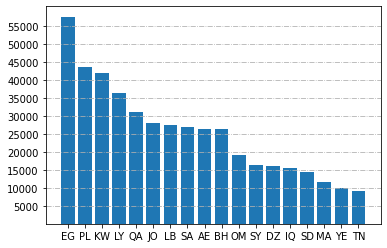

In [13]:
val_count = df["dialect"].value_counts()
plt.bar(x=val_count.index, height=val_count)
plt.yticks(list(range(5000, 60000, 5000)))
plt.grid(axis="y", ls='-.') 
print(val_count)

The brevious chart shows that the data is imbalanced,as example:- instances number of "EG" category is 5 times "TN" or "YE" ones.

In [14]:
# from transformers import AutoTokenizer, AutoModel

# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
# model = AutoModel.from_pretrained("bert-base-uncased")

# inputs = tokenizer("Hello world!", return_tensors="pt")
# outputs = model(**inputs)




# from transformers import AutoTokenizer, AutoModelForMaskedLM
# tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-large-arabertv2")
# model = AutoModelForMaskedLM.from_pretrained("aubmindlab/bert-large-arabertv2")

Some weights of the model checkpoint at aubmindlab/bert-large-arabertv2 were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [52]:
le = LabelEncoder()
le.fit(df["dialect"])
df["encoded_dialect"] = le.transform(df["dialect"])
df["encoded_dialect"]

id
1175358310087892992    4
1175416117793349632    4
1175450108898565888    4
1175471073770573824    4
1175496913145217024    4
                      ..
1019484980282580992    1
1021083283709407232    1
1017477537889431552    1
1022430374696239232    1
1022409931029458944    1
Name: encoded_dialect, Length: 458197, dtype: int32

In [59]:
# from datasets import load_dataset

# dataset = load_dataset("yelp_review_full")
# dataset

In [60]:
# dataset["train"]["text"]

In [29]:
# dic = arabert_tokenizer([i for i in df["txt"]]
#                         # , padding="max_length", truncation=True
#                        )
# df["txt_input_ids"] = dic["input_ids"]
# df["txt_token_type_ids"] = dic["token_type_ids"]
# df["txt_attention_mask"] = dic["attention_mask"]  

In [55]:
# sum([1 for i , j, k in zip(df["txt_attention_mask"], df["txt_token_type_ids"], df["txt_input_ids"])])
# after some tests
# token_type_ids = list(list(ones)) where every list length==length of input_ids
# so we just need "input_ids" as it contains all the information
# 458197
# 458197
# 10491065
# 10491065

In [54]:
df["txt_input_ids"] = arabert_tokenizer([i for i in df["txt"]]
                        # , padding="max_length", truncation=True
                       )["input_ids"]

In [58]:
xtrain, xtest, ytrain, ytest = train_test_split(df["txt_input_ids"], df["encoded_dialect"], test_size=0.15, 
                                                random_state=7, shuffle=True, stratify=df["dialect"])

print(f" xtrain.shape = {xtrain.shape}\n xtest.shape = {xtest.shape}")

 xtrain.shape = (389467,)
 xtest.shape = (68730,)


In [61]:
df[["txt_input_ids", "encoded_dialect"]].to_csv("../csv_files/tokenized_txt_df.csv")

In [64]:
pd.read_csv("../csv_files/tokenized_txt_df.csv", index_col="id")

,txt_input_ids,encoded_dialect
id,,
1175358310087892992,"[33, 523, 4350, 27562, 7952, 25118, 7553, 34]",4
1175416117793349632,"[33, 2253, 387, 8888, 421, 8127, 426, 25737, 9...",4
1175450108898565888,"[33, 4691, 290, 2288, 223, 2136, 34]",4
1175471073770573824,"[33, 8375, 300, 2002, 217, 57410, 26792, 13280...",4
1175496913145217024,"[33, 7434, 1081, 31818, 3074, 663, 534, 34]",4
...,...,...
1019484980282580992,"[33, 29880, 303, 38526, 4308, 18171, 2322, 34]",1
1021083283709407232,"[33, 6689, 223, 59039, 223, 2867, 200, 10245, ...",1
1017477537889431552,"[33, 3166, 48109, 195, 7669, 9856, 8964, 209, ...",1


In [ ]:
le.inverse_transform(df["encoded_dialect"])

In [1]:
# df = pd.merge(txt_df, label_df, left_index=True, right_index=True)
# df = pd.concat([txt_df, label_df], axis=1)
# df